Accuracy 0.78
              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       798
         1.0       0.65      0.26      0.37       259

    accuracy                           0.78      1057
   macro avg       0.72      0.61      0.62      1057
weighted avg       0.76      0.78      0.75      1057



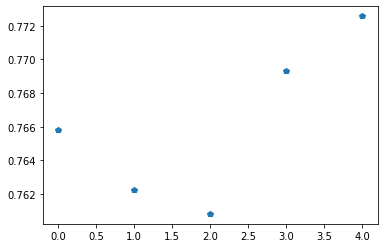

In [6]:
import numpy as np

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt

%matplotlib inline

input_feature_matrix = np.genfromtxt('../RESOURCE/processed_data.csv', delimiter = ',', dtype = float, skip_header = 1, usecols = range(19))

output = np.genfromtxt('../RESOURCE/processed_data.csv', delimiter = ',', dtype = float, skip_header = 1, usecols = 19)

input_feature_matrix = SimpleImputer(missing_values=np.nan, strategy='mean').fit(input_feature_matrix).transform(input_feature_matrix)

trainX, testX, trainY, testY = train_test_split(input_feature_matrix, output, train_size = 0.85, test_size = 0.15, random_state = 1)

model = SVC(gamma='auto').fit(trainX, trainY)

predY = model.predict(testX)

print("Accuracy {:.2f}".format(accuracy_score(predY, testY)))

print(classification_report(testY, predY))

modelSVMCV = cross_validate(model,input_feature_matrix,output,cv = 5)

plt.plot(modelSVMCV['test_score'], "p")